# Traitement des données relatives à tous les joueurs ayant participé à la coupe du monde 2018 de football

### Il s'agira ici de déblayer les nombreuses données relatives à cet évenement mondial afin de tenter de comparer les équipes, les joueurs, et de dégager des tendances d'ensemble.

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
url = "https://public.tableau.com/app/sample-data/world_cup_2018_squads.xlsx"
data = pd.read_excel(url)

##### Première approche des données

In [4]:
data.head()

,Type,Team,Group,Position,Name,DOB,Caps,Goals,Country and Club
0,Age,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England Aston Villa
1,Age,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt Al Ahly
2,Age,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England West Bromwich Albion
3,Age,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England West Bromwich Albion
4,Age,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt Al Ahly


##### Suppression de la colonne dite 'Type'

In [5]:
data2=data.drop(columns="Type")

On vérifie la suppression de la colonne

In [6]:
data2.head()

,Team,Group,Position,Name,DOB,Caps,Goals,Country and Club
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England Aston Villa
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt Al Ahly
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England West Bromwich Albion
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England West Bromwich Albion
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt Al Ahly


##### On vérifie la propreté des données, en particulier la possible absence de données.

In [7]:
data.isnull().sum()

Type                0
Team                0
Group               0
Position            0
Name                0
DOB                 0
Caps                0
Goals               0
Country and Club    0
dtype: int64

In [8]:
data2.dtypes

Team                object
Group               object
Position            object
Name                object
DOB                 object
Caps                 int64
Goals                int64
Country and Club    object
dtype: object

##### On réalise un premier tri croissant en fonction du nombre de buts marqués, puis des capes (i.e nombre de matchs internationaux disputés par un joueur).

In [9]:
data2.sort_values(by="Goals")

,Team,Group,Position,Name,DOB,Caps,Goals,Country and Club
1071,Iceland,D,GK,Hannes Þór Halldórsson,1984-04-27,48,0,Denmark Randers
980,France,C,GK,Alphonse Areola,1993-02-27,0,0,France Paris Saint-Germain
975,France,C,FW,Florian Thauvin,1993-01-26,3,0,France Marseille
449,Switzerland,E,GK,Roman Bürki,1990-11-14,8,0,Germany Borussia Dortmund
450,Switzerland,E,GK,Yann Sommer,1988-12-17,34,0,Germany Borussia Mönchengladbach
...,...,...,...,...,...,...,...,...
1114,Brazil,E,FW,Neymar,1992-02-05,83,53,France Paris Saint-Germain
286,Argentina,D,FW,Lionel Messi (captain),1987-06-24,123,61,Spain Barcelona
1022,Argentina,D,FW,Lionel Messi (captain),1987-06-24,123,61,Spain Barcelona
147,Portugal,B,FW,Cristiano Ronaldo (captain),1985-02-05,149,81,Spain Real Madrid


##### On remarque déjà ici que le nombre de buts marqués par joueur prend des valeurs comprises entre 0 et 81 buts (la valeur 0 faisant sens pour des joueurs évoluant à un poste non destiné à inscrire des buts, comme celui de gardien).

In [10]:
data2.sort_values(by='Caps')

,Team,Group,Position,Name,DOB,Caps,Goals,Country and Club
244,France,C,GK,Alphonse Areola,1993-02-27,0,0,France Paris Saint-Germain
92,Iran,B,DF,Majid Hosseini,1996-06-20,0,0,Iran Esteghlal
451,Switzerland,E,GK,Yvon Mvogo,1994-06-06,0,0,Germany RB Leipzig
1187,Switzerland,E,GK,Yvon Mvogo,1994-06-06,0,0,Germany RB Leipzig
1092,Nigeria,D,FW,Simeon Nwankwo,1992-05-07,0,0,Italy Crotone
...,...,...,...,...,...,...,...,...
883,Portugal,B,FW,Cristiano Ronaldo (captain),1985-02-05,149,81,Spain Real Madrid
168,Spain,B,DF,Sergio Ramos (captain),1986-03-30,151,13,Spain Real Madrid
904,Spain,B,DF,Sergio Ramos (captain),1986-03-30,151,13,Spain Real Madrid
11,Egypt,A,GK,Essam El-Hadary (captain),1973-01-15,156,0,Saudi Arabia Al Taawoun


##### Ici un intervalle qui s'étend de 0 à 156 capes, signifiant que des joueurs participent ici à leur première compétition internationale, tandis que d'autres ont déjà une grande expérience dans l'exercice.

##### On remet ensuite les données en Français.

In [11]:
data2.rename(columns={'Team':'Equipe','Group':'Groupe','Position':'Poste','Name':'Nom','DOB':'Naissance','Caps':'Capes','Goals':'Buts','Country and Club':'Pays et Club'},inplace=True)

In [12]:
data2.head()

,Equipe,Groupe,Poste,Nom,Naissance,Capes,Buts,Pays et Club
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England Aston Villa
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt Al Ahly
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England West Bromwich Albion
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England West Bromwich Albion
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt Al Ahly


##### On regarde la moyenne totale de buts au sein de tous les joueurs.

In [13]:
mean_goals = data2['Buts'].mean()

In [14]:
print(mean_goals)

4.391304347826087


##### On s'aperçoit que celle-ci est assez basse en raison des nombreux joueurs évoluant à des postes non destinés à marquer des buts i.e défenseurs ou bien gardiens.

##### On change le type de la donnée 'Naissance' et on vérifie le changement.

In [15]:
data2.Naissance = pd.to_datetime(data2.Naissance)

In [16]:
data2.dtypes

Equipe                  object
Groupe                  object
Poste                   object
Nom                     object
Naissance       datetime64[ns]
Capes                    int64
Buts                     int64
Pays et Club            object
dtype: object

In [17]:
data2.describe()

,Naissance,Capes,Buts
count,1472,1472.000000,1472.000000
mean,1990-07-25 02:26:44.347826048,33.745924,4.391304
min,1973-01-15 00:00:00,0.000000,0.000000
25%,1987-09-20 18:00:00,9.000000,0.000000
50%,1990-10-06 12:00:00,23.500000,1.000000
75%,1993-04-07 18:00:00,51.000000,5.000000
max,1999-01-04 00:00:00,156.000000,81.000000
std,NaN,31.777299,8.641772


In [18]:
data2.Equipe.unique()

array(['Egypt', 'Russia', 'Saudi Arabia', 'Uruguay', 'Iran', 'Morocco',
       'Portugal', 'Spain', 'Australia', 'Denmark', 'France', 'Peru',
       'Argentina', 'Croatia', 'Iceland', 'Nigeria', 'Brazil',
       'Costa Rica', 'Serbia', 'Switzerland', 'Germany', 'Mexico',
       'South Korea', 'Sweden', 'Belgium', 'England', 'Panama', 'Tunisia',
       'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)

##### Premier histogramme affichant le nombre total de joueurs par intervalle de capes.

<Axes: >

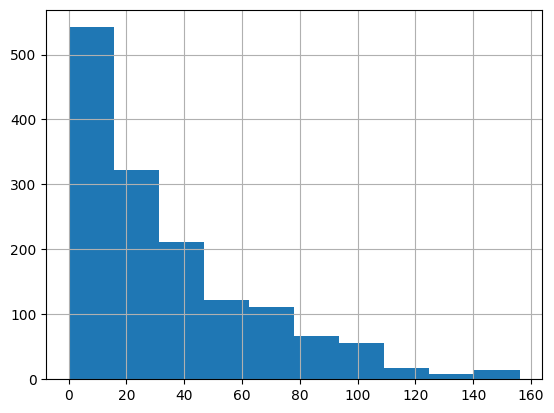

In [19]:
data2.Capes.hist()

##### Décompte du nombre de joueurs par nombre de buts.

In [20]:
data2.Buts.value_counts()

Buts
0     614
1     188
2     128
3     104
4      58
5      48
7      42
6      38
9      32
8      26
10     18
13     18
12     18
18     16
11     16
14     12
21      8
19      8
50      6
30      6
15      6
20      4
23      4
17      4
16      4
29      4
31      4
36      4
43      4
25      2
26      2
49      2
22      2
38      2
24      2
53      2
61      2
34      2
35      2
33      2
81      2
42      2
28      2
52      2
Name: count, dtype: int64

##### On s'aperçoit que la majorité des joueurs ont marqué moins de 5 buts, expliquant la faible moyenne calculée précédemment.

##### On dénombre le total de joueurs évoluant à chaque poste.

In [21]:
Postes = ["GK","DF","MF","FW"]
for poste in Postes:
        count=0
        for i in range(737):
            if data2.iloc[i-1,2] == poste :
                count += 1
        print(f"{count} jouent au poste de {poste}")

96 jouent au poste de GK
248 jouent au poste de DF
250 jouent au poste de MF
143 jouent au poste de FW


<Axes: >

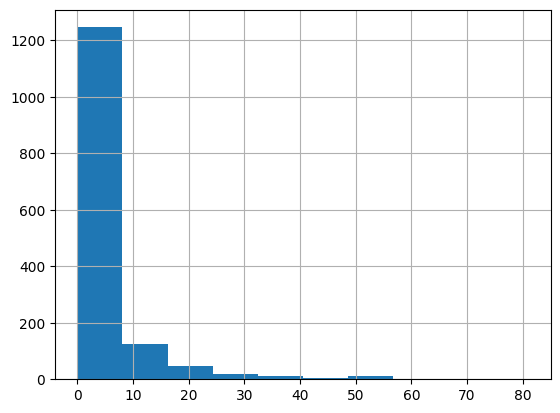

In [22]:
data2.Buts.hist()

##### Amélioration de la taille de l'histogramme

<Axes: >

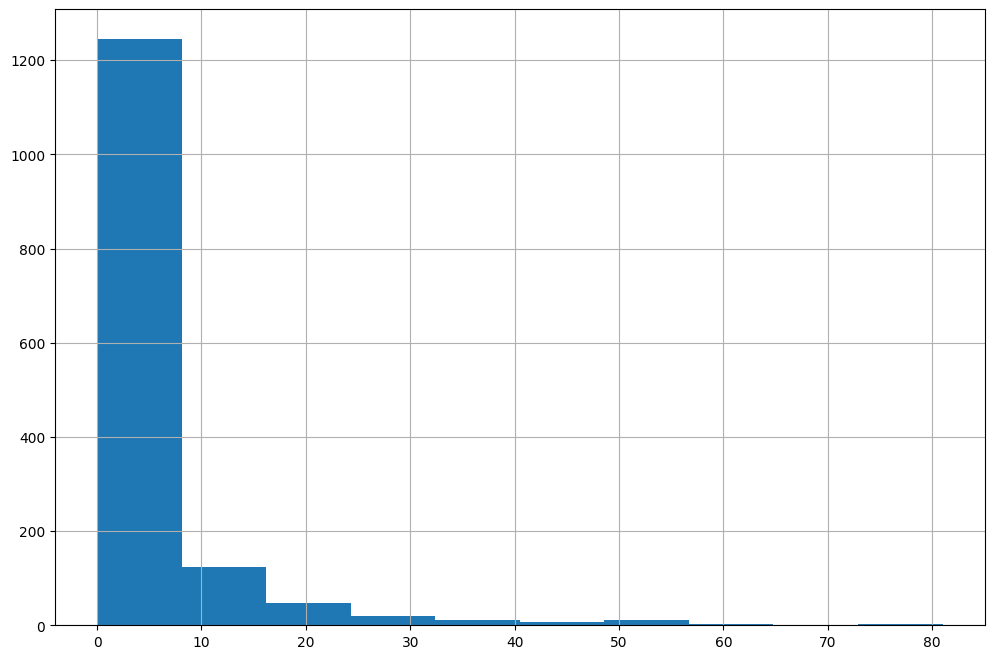

In [23]:
data2.Buts.hist(figsize=(12, 8))

##### Graphe en nuage de points reliant le nombre de buts marqués au nombre de capes

<Axes: xlabel='Capes', ylabel='Buts'>

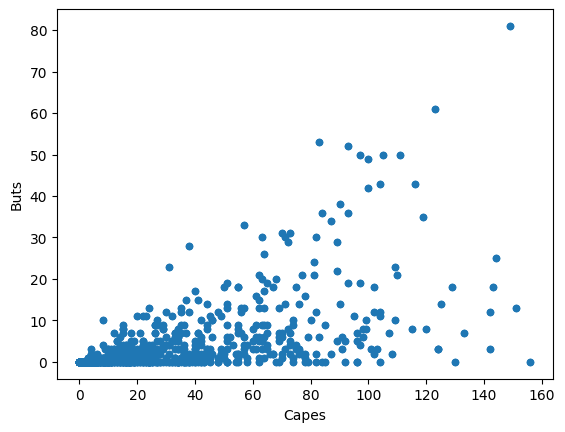

In [24]:
data2.plot.scatter(x="Capes", y="Buts")


##### On va s'intéresser maintenant aux données des joueurs Egyptiens, on vérifie les données puis on trace un graphe affichant le nombre de buts par joueur pour un nombre réduit de joueurs.

In [25]:
dfEgypte=data2.query("Equipe=='Egypt'")

In [26]:
dfEgypte.tail()

,Equipe,Groupe,Poste,Nom,Naissance,Capes,Buts,Pays et Club
754,Egypt,A,MF,Ramadan Sobhi,1997-01-23,21,1,England Stoke City
755,Egypt,A,MF,Sam Morsy,1991-09-10,3,0,England Wigan Athletic
756,Egypt,A,MF,Shikabala,1986-03-05,28,2,Saudi Arabia Al Raed
757,Egypt,A,MF,Tarek Hamed,1988-10-24,19,0,Egypt Zamalek
758,Egypt,A,MF,Trézéguet,1994-10-01,23,2,Turkey Kasımpaşa


In [27]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [28]:
dfEgypte2=dfEgypte.loc[6:10]

In [29]:
dfEgypte2

,Equipe,Groupe,Poste,Nom,Naissance,Capes,Buts,Pays et Club
6,Egypt,A,DF,Mohamed Abdel-Shafy,1985-07-01,49,1,Saudi Arabia Al Fateh
7,Egypt,A,DF,Omar Gaber,1992-01-30,23,0,United States Los Angeles FC
8,Egypt,A,DF,Saad Samir,1989-04-01,10,0,Egypt Al Ahly
9,Egypt,A,FW,Marwan Mohsen,1989-02-26,22,4,Egypt Al Ahly
10,Egypt,A,FW,Mohamed Salah,1992-06-15,57,33,England Liverpool


<Axes: xlabel='Nom des joueurs'>

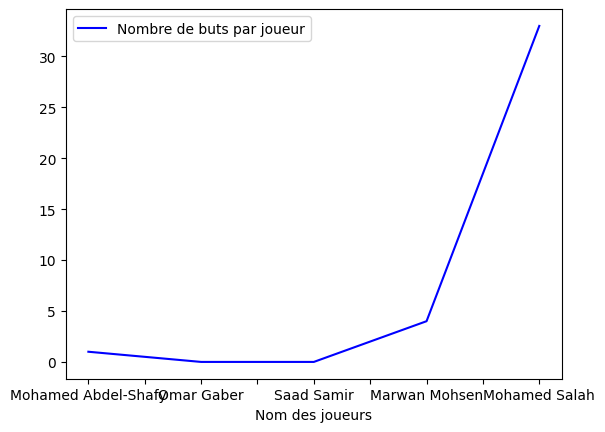

In [30]:
dfEgypte2.plot(x="Nom", y="Buts", label="Nombre de buts par joueur", color="blue",legend=True, xlabel="Nom des joueurs")

##### On réalise un groupby afin de réunir les données par pays.

In [31]:
groupe = data2.groupby("Equipe")

##### On affiche ici le nombre de buts internationaux marqués par le joueur le plus prolifique de chaque équipe.

In [32]:
groupe["Buts"].max()

Equipe
Argentina       61
Australia       50
Belgium         30
Brazil          53
Colombia        29
Costa Rica      23
Croatia         30
Denmark         21
Egypt           33
England         15
France          30
Germany         38
Iceland         18
Iran            23
Japan           50
Mexico          49
Morocco         10
Nigeria         13
Panama          43
Peru            34
Poland          52
Portugal        81
Russia          12
Saudi Arabia    28
Senegal         18
Serbia          13
South Korea     20
Spain           35
Sweden          18
Switzerland     20
Tunisia         12
Uruguay         50
Name: Buts, dtype: int64

##### Affichage du nombre de buts marqués en fonction du nombre de capes (ici uniquement sur les joueurs égyptiens pour plus de lisibilité). On remarque ainsi qu'en raison des postes très différents au sein d'une équipe, le nombre de buts marqués n'est pas immédiatement corrélé avec le nombre de capes. De plus, le seul joueur ayant dépassé la barre des 30 buts inscrits n'est pas pour autant le joueur le plus capé.

//miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


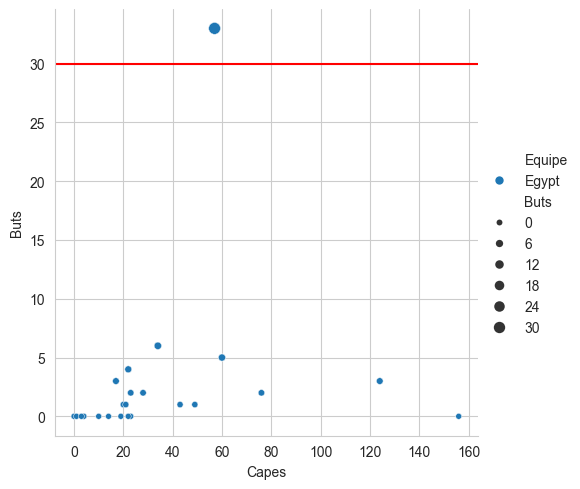

In [33]:
import seaborn as sns
sns.set_style('whitegrid')
ax=sns.relplot(data=dfEgypte, x='Capes', y='Buts',hue='Equipe',size='Buts')
ax.ax.axhline(y=30,color='red')

##### Tracé d'un graphe permettant de visualiser rapidement quelles équipes disposent d'un joueur ayant marqué un nombre très important de buts, comme le Portugal, l'Argentine ou le Brésil.

//miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


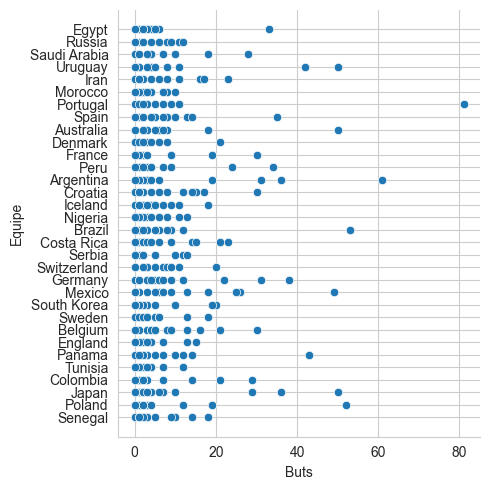

In [34]:
sns.relplot(data=data2,x='Buts',y='Equipe')